# Monte Carlo Stock Price Predictor

In [21]:
# Import libraries
import requests
import os
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [3]:
# Read in Adj Close prices from csv
stock_df = pd.read_csv("../Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)['Adj Close']
stock_df = stock_df.sort_index()
stock_df.tail()

Date
2021-07-13    279.209991
2021-07-14    278.309998
2021-07-15    279.720001
2021-07-16    277.899994
2021-07-19    272.660004
Name: Adj Close, dtype: float64

In [4]:
# Calculate stock returns
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

Date
2015-08-10   -0.000906
2015-08-11   -0.004323
2015-08-12   -0.008403
2015-08-13    0.002472
2015-08-14    0.004368
Name: Adj Close, dtype: float64

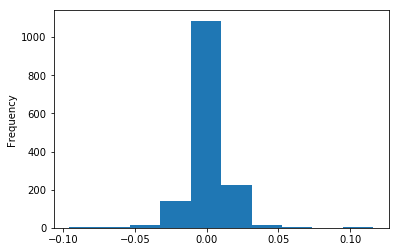

In [5]:
# Plot frequency distribution of returns
returns.plot(kind="hist")

In [6]:
# Calculate mean and standard dev of returns
mean = returns.mean()
std = returns.std()
(mean, std)

(0.000516807689653584, 0.013252524503994324)

In [7]:
from random import gauss
# Calculate the specific normal distribution of analyzed stock based on its average returns and standard deviation
gauss(mean, std)

-0.005036227486176282

In [8]:
# Read in last stock price
last_val = stock_df.iloc[-1]
last_val

272.66000366210943

In [9]:
# Simulate the next stock value based on probability distribution
last_val * (1+gauss(mean,std))

270.1795118087175

In [10]:
# Simulate stock values for the next 15 days
simvals = [last_val]
days=15

for day in range(days):
    newval = simvals[-1] * (1+gauss(mean,std))
    simvals.append(newval)

simvals

[272.66000366210943,
 270.53284383275854,
 272.097766843757,
 272.81340868382125,
 268.17004667191645,
 274.1894825058251,
 270.36814289988047,
 270.24002726159506,
 272.9292981833313,
 275.1030815990781,
 275.4729136288243,
 280.9725428890437,
 281.09040453523613,
 276.62022674517215,
 278.2599586831461,
 285.451171224879]

In [11]:
# Function to simulate stock prices
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        
    return simvals

In [12]:
# Simulate next 15 day stock prices based on the last price
simulate_stocks(15,last_val)

[272.66000366210943,
 274.98000973315914,
 274.456031608543,
 277.4506228809139,
 268.99085049886315,
 269.9709573437948,
 273.66698544036484,
 280.1402010282604,
 277.0172754625428,
 273.05175114125325,
 269.8636629141947,
 266.86596083932073,
 269.86629226232355,
 266.63662740178466,
 271.1068441779882,
 273.2719508601612]

In [13]:
# Simulate stock prices based on 1000 different random scenarios
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [14]:
# Create dataframe of possible stock prices based on 1000 random scenarios
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,272.660004,273.659167,276.958541,274.086200,279.683289,275.880977,272.010722,274.544966,273.452747,274.652168,268.758883,270.264987,275.523882,277.773575,277.961821,273.731301
1,272.660004,272.220403,280.403876,277.412954,279.670293,280.319933,278.572068,276.508419,273.940370,269.615704,272.657192,274.792537,272.907834,270.670358,267.949453,267.987067
2,272.660004,271.356976,270.123736,271.080308,269.374219,272.035909,266.789298,261.970834,263.489871,265.178255,267.138535,265.963567,263.044174,261.856252,259.888633,264.275827
3,272.660004,267.530366,269.999924,270.215267,263.446377,263.616322,260.757697,257.146137,254.021289,252.827932,252.091472,251.518535,250.444761,247.218460,245.731231,250.180592
4,272.660004,275.347573,280.627192,282.570373,278.957204,279.507265,277.361713,277.247850,274.533616,274.238546,276.827052,278.315631,278.084494,271.679864,274.033157,267.833926


In [15]:
# Possible outcomes based on the each of 1000 scenarios (transformed dataframe)
results_df = pd.DataFrame(results).T
results_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
11,270.264987,274.792537,265.963567,251.518535,278.315631,274.046423,280.023980,268.063321,274.407792,294.992835,...,268.248505,271.109968,279.797622,295.280467,278.504847,271.228418,273.129661,274.184209,259.918424,278.755315
12,275.523882,272.907834,263.044174,250.444761,278.084494,269.632570,280.989207,273.330324,270.903627,295.604954,...,271.721098,277.277429,281.090568,299.083224,279.572715,275.757447,270.604280,278.619168,260.495235,272.452526
13,277.773575,270.670358,261.856252,247.218460,271.679864,267.210171,277.924836,271.474266,265.447107,297.873571,...,267.549528,274.432440,279.908813,299.132048,277.219415,280.489539,263.428169,272.662139,261.388413,272.252543
14,277.961821,267.949453,259.888633,245.731231,274.033157,268.174235,279.955268,266.401514,262.291785,296.672267,...,266.360981,276.709585,278.374580,294.475652,281.303957,287.554021,269.372032,275.714140,253.120569,275.421879
15,273.731301,267.987067,264.275827,250.180592,267.833926,265.108698,274.118428,268.688522,263.923011,298.362672,...,268.507092,277.331448,278.835779,289.953702,277.128896,290.370271,268.854275,273.195520,250.711288,272.902516


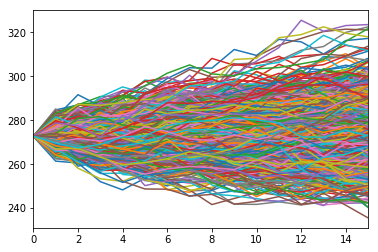

In [16]:
# Plot all possible stock price scenarios
results_df.plot(legend=False)

In [17]:
# Read in the end values (15th day) from the simulation
end_values = results_df.iloc[-1]
end_values.head()

0    273.731301
1    267.987067
2    264.275827
3    250.180592
4    267.833926
Name: 15, dtype: float64

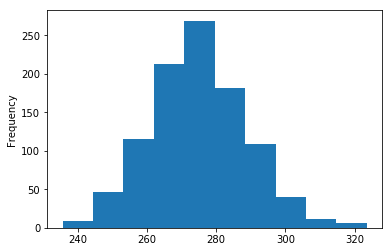

In [18]:
# Plot the probability distribution of end values from the simulation
end_values.plot(kind="hist")

In [19]:
# Calculate the range of possible prices 
end_values.quantile([0.1,0.9])

0.1    257.890890
0.9    292.561505
Name: 15, dtype: float64

In [20]:
# Read in last stock price
last_val

272.66000366210943